# COIL PRODUCTION ANALYSIS

## Background

![CRC](imagename.png)

   In Steel manufacturing company, there is cold rolling process. This process will produce cold rolled coil(CRC). CRC have better surface quality, thinner and with more precise size, also have good mechanical property and excellent durability and finishes, while hot rolled coils have excellent formability and weldability, CRC are used in a wide range of applications, such as automotive manufacturing, electrical products, rolling stock, aviation, precision instruments, and food cans. But in this process, have several challange that make reduce the efficiency of the process, this process can produce "byproduct material" a.k.a Scrap. this material caused by production parameter or defect after process. In this case we have to find what that make yield of process reduced.

COLUMN EXPLANATION :

    NO                     : No. of Coil
    HRC_THICKNESS          : Raw Material Thickness 
    HRC_WIDTH              : Raw Material Width 
    HRC_WEIGHT             : Raw Material Weight 
    XXXXX_DATE             : Date process of process's unit X
    XXXXX_TONNAGE_INPUT    : Weight Input of process's unit X
    XXXXX_TONNAGE_OUTPUT   : Weight Output of process's unit X
    XXXXX_SCRAP            : Weight Byproduct of process's unit X
    XXXXX_DF               : Efficiency of process's unit X
    PIKLING_LOSE           : Weight material that dissolved in acid
    SOURCE                 : Source of Raw Material
    ROLLING_LINE           : Unit of Cold Rolling Mill Line (6hi/bls)
    XXXXX_TIME             : Time process of process's unit X
    OUTPUT_THICKNESS       : Output Thickness from CRM process
    OUTPUT_WIDTH           : Output Width from CRM process
    CRC_SIZE               : Cold Rolled Coil Size
    SALES_ORDER            : No. Of Sales Order
    SCRAP_HRC_FINISH       : Total Byproduct from first process to the last
    YIELD(%)               : Efficiency process to finish by Coil
    REMARK                 : Additional Note
    
 Unit Of Measurement :
 
    Weight      : Metric Ton(MT) and Kilograms (Kg)
    Length      : milimeter (mm)
    Time        : minutes (m)
    Date Format : YYYY-MM-DD

## Code 

### Import Library

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.options.display.max_columns = 50
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

### Import and Check Dataset

In [2]:
df = pd.read_csv(r'C:\Users\fikri\Desktop\pyproj\coil performance\coil_final.csv') ## import dataset

In [3]:
print("There are {} rows and {} columns in dataset".format(df.shape[0],df.shape[1]))
df.head()

There are 1457 rows and 35 columns in dataset


,NO,HRC_THICKNESS,HRC_WIDTH,HRC_WEIGHT,PICKLING_DATE,SLITING_TONNAGE_INPUT,SLITING_TONNAGE_OUTPUT,SLITING_SCRAP,SLITING_DF,PICKLING_TONNAGE_INPUT,PICKLING_TONNAGE_OUTPUT,PIKLING_LOSE,PICKLING_DF,SOURCE,ROLLING_LINE,ROLLING_DATE,ROLLING_TIME,OUTPUT_THICKNESS,OUTPUT_WIDTH,CRC_SIZE,ROLLING_TONNAGE_INPUT,ROLLING_TONNAGE_OUTPUT,ROLLING_SCRAP,ROLLING_DF,SALES_ORDER,FINISHING_DATE,FINISHING_TIME,FINISHING_TONNAGE_INPUT,FINISHING_TONNAGE_OUTPUT,FINISHING_ID_SCRAP,FINISHING_TRIMING_LOSE,FINISHING_DF,SCRAP_HRC_FINISH,YIELD(%),REMARK
0,1,2.6,1240,19780,2020-12-10,NaN,NaN,NaN,NaN,19780.0,19560,220.0,0.988878,GR,6HI,2020-12-12,35.0,0.7,1219,0.70 X 1219,19560,19400,160,0.991820,SP0-2104-0107,2021-01-03,20,19400,18375,140.0,885,0.947165,1405,0.928969,NaN
1,2,2.2,1240,22840,2020-12-10,NaN,NaN,NaN,NaN,22840.0,22635,205.0,0.991025,KS,6HI,2020-12-12,23.0,0.7,1219,0.70 X 1219,22635,22520,115,0.994919,SP0-2104-0107,2021-01-03,15,22520,21290,280.0,950,0.945382,1550,0.932137,NaN
2,3,2.2,1240,22820,2020-12-10,NaN,NaN,NaN,NaN,22820.0,22585,235.0,0.989702,KS,6HI,2020-12-12,29.0,0.7,1219,0.70 X 1219,22585,22450,135,0.994023,SP0-2104-0107,2021-01-03,15,22450,21350,145.0,955,0.951002,1470,0.935583,NaN
3,4,2.2,1240,22720,2020-12-10,NaN,NaN,NaN,NaN,22720.0,22540,180.0,0.992077,KS,6HI,2020-12-12,22.0,0.7,1219,0.70 X 1219,22540,22400,140,0.993789,SP0-2104-0107,2021-01-03,20,22400,21445,150.0,805,0.957366,1275,0.943882,NaN
4,5,2.2,1240,22660,2020-12-10,NaN,NaN,NaN,NaN,22660.0,22430,230.0,0.989850,KS,6HI,2020-12-12,19.0,0.7,1219,0.70 X 1219,22430,22300,130,0.994204,SP0-2104-0107,2021-01-03,15,22300,21285,135.0,880,0.954484,1375,0.939320,NaN


In [4]:
print("Checking datatype every column")
print(df.info(verbose=True))

Checking datatype every column
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1457 entries, 0 to 1456
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   NO                        1457 non-null   int64  
 1   HRC_THICKNESS             1457 non-null   float64
 2   HRC_WIDTH                 1457 non-null   int64  
 3   HRC_WEIGHT                1457 non-null   int64  
 4   PICKLING_DATE             1457 non-null   object 
 5   SLITING_TONNAGE_INPUT     680 non-null    float64
 6   SLITING_TONNAGE_OUTPUT    680 non-null    float64
 7   SLITING_SCRAP             680 non-null    float64
 8   SLITING_DF                680 non-null    float64
 9   PICKLING_TONNAGE_INPUT    1457 non-null   float64
 10  PICKLING_TONNAGE_OUTPUT   1457 non-null   int64  
 11  PIKLING_LOSE              1457 non-null   float64
 12  PICKLING_DF               1457 non-null   float64
 13  SOURCE                    1457 n

#### checking null values

In [5]:
df.isnull().sum()

NO                             0
HRC_THICKNESS                  0
HRC_WIDTH                      0
HRC_WEIGHT                     0
PICKLING_DATE                  0
SLITING_TONNAGE_INPUT        777
SLITING_TONNAGE_OUTPUT       777
SLITING_SCRAP                777
SLITING_DF                   777
PICKLING_TONNAGE_INPUT         0
PICKLING_TONNAGE_OUTPUT        0
PIKLING_LOSE                   0
PICKLING_DF                    0
SOURCE                         0
ROLLING_LINE                   0
ROLLING_DATE                   0
ROLLING_TIME                   1
OUTPUT_THICKNESS               0
OUTPUT_WIDTH                   0
CRC_SIZE                       0
ROLLING_TONNAGE_INPUT          0
ROLLING_TONNAGE_OUTPUT         0
ROLLING_SCRAP                  0
ROLLING_DF                     0
SALES_ORDER                    0
FINISHING_DATE                 0
FINISHING_TIME                 0
FINISHING_TONNAGE_INPUT        0
FINISHING_TONNAGE_OUTPUT       0
FINISHING_ID_SCRAP             2
FINISHING_

In [6]:
# there 2 columns with null values
# check where row that has null value
df[df['ROLLING_TIME'].isnull()].index.tolist()

[195]

In [7]:
# fill null value 'FINISHING_ID_SCRAP' to 0
# fill null value 'ROLLING_TIME' with average time process with same size.
df['FINISHING_ID_SCRAP'].fillna(0,inplace=True)
df['ROLLING_TIME'].iloc[195] = df[df['CRC_SIZE'] == df['CRC_SIZE'].iloc[195]]['ROLLING_TIME'].mean()
print(df['ROLLING_TIME'].iloc[195])
print(df['FINISHING_ID_SCRAP'].isnull().sum())

26.726027397260275
0


c:\users\fikri\appdata\local\programs\python\python37\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


### DATA WRANGLING

In [8]:
## change datatype for date data
date_data = ['PICKLING_DATE','ROLLING_DATE','FINISHING_DATE']
for date in date_data :
    df[date] = pd.to_datetime(df[date])
    print(df[date].head())

0   2020-12-10
1   2020-12-10
2   2020-12-10
3   2020-12-10
4   2020-12-10
Name: PICKLING_DATE, dtype: datetime64[ns]
0   2020-12-12
1   2020-12-12
2   2020-12-12
3   2020-12-12
4   2020-12-12
Name: ROLLING_DATE, dtype: datetime64[ns]
0   2021-01-03
1   2021-01-03
2   2021-01-03
3   2021-01-03
4   2021-01-03
Name: FINISHING_DATE, dtype: datetime64[ns]


In [9]:
# CHANGE OUTPUT_WIDTH AND OUTPUT_THICKNESS TO CATEGORICAL DATA RANGE

df['WIDTH_RANGE'] = pd.cut(df['OUTPUT_WIDTH'], [0, 929, 1000, 1300], labels=['<930', '930-1000', '1000-1300'])
df['THICKNESS_RANGE'] = pd.cut(df['OUTPUT_THICKNESS'], [0, 0.249,0.649,1,2], labels=['<0.250', '0.250-0.649', '0.650-1','>1'])

# THERE IS STANDARD FOR 'YIELD(%)' VALUE IF WANT TO SEND FINISH GOODS TO CUSTOMER,
# RANGE YIELD THRESHOLD IS 92%-97% THAT ACCEPTABLE
df['status'] = np.where((df['YIELD(%)'] <0.92),'Below Low Threshold',np.where(
                             (df['YIELD(%)'] >= 0.92)  & (df['YIELD(%)'] <=0.97) ,'Acceptable',np.where\
                             ((df['YIELD(%)'] >0.97) ,'Above Upper Threshold','out of parameter' )))


### Find product yield acceptance

In [10]:
status_df1 = df['status'].value_counts().reset_index()
status_df2 = df['status'].value_counts(normalize=True).reset_index()

status_df = status_df1.merge(status_df2,how='inner',on='index')
status_df

,index,status_x,status_y
0,Acceptable,1303,0.894303
1,Below Low Threshold,154,0.105697


When categorize the coil in this dataset have 155 coil that below threshold it's about 10% Production have low Yield. in next section we need find the cause of this problem.

In [11]:
# find top 5 of total low Yield Coil by CRC Size
case = df[df['status'] != 'Acceptable']['CRC_SIZE'].value_counts().reset_index().sort_values('CRC_SIZE',ascending=False).head()
case['ratio'] = (case['CRC_SIZE']/sum(case['CRC_SIZE']))*100
case

,index,CRC_SIZE,ratio
0,0.20 X 762,62,45.925926
1,0.20 X 914,57,42.222222
2,0.90 X 1219,9,6.666667
3,0.75 X 914,4,2.962963
4,1.10 X 1219,3,2.222222


the result above show that CRC with size (0.20x762) and (0.20x914) have many product with low yield. it's over 40% of total low yield coil. then we need to explore every scrap in unit process for that 5 size

In [12]:
size_req = case['index'][:5]
scrap_size = df[df['status'] != 'Acceptable'].groupby('CRC_SIZE')[['SLITING_SCRAP','PIKLING_LOSE','ROLLING_SCRAP','FINISHING_ID_SCRAP',\
                                               'FINISHING_TRIMING_LOSE']].mean().reset_index().round(2)
scrap_size[scrap_size['CRC_SIZE'].str.contains('|'.join(size_req))]

,CRC_SIZE,SLITING_SCRAP,PIKLING_LOSE,ROLLING_SCRAP,FINISHING_ID_SCRAP,FINISHING_TRIMING_LOSE
1,0.20 X 762,NaN,74.84,135.56,325.65,901.29
2,0.20 X 914,350.0,114.39,230.61,565.53,510.09
8,0.75 X 914,400.0,185.00,133.75,660.00,200.00
12,0.90 X 1219,NaN,195.56,157.22,298.33,1028.89
17,1.10 X 1219,NaN,158.33,121.67,228.33,1451.67


In [13]:
#if we compare with acceptable coil
scrap_size_acc = df[df['status'] == 'Acceptable'].groupby('CRC_SIZE')[['SLITING_SCRAP','PIKLING_LOSE','ROLLING_SCRAP','FINISHING_ID_SCRAP',\
                                               'FINISHING_TRIMING_LOSE']].mean().reset_index().round(2)
scrap_size_acc[scrap_size_acc['CRC_SIZE'].str.contains('|'.join(size_req))]

,CRC_SIZE,SLITING_SCRAP,PIKLING_LOSE,ROLLING_SCRAP,FINISHING_ID_SCRAP,FINISHING_TRIMING_LOSE
1,0.20 X 762,NaN,74.38,125.62,339.38,798.12
2,0.20 X 914,275.00,104.54,149.63,398.60,445.90
29,0.75 X 914,401.25,161.88,112.36,366.60,8.33
37,0.90 X 1219,NaN,183.16,129.47,246.84,901.58
42,1.10 X 1219,NaN,157.50,150.71,241.43,1008.57


as the result above, the diffecence between scrap with low yield and acceptable yield is showed in rolling and finishing process. for low yield coil show that many scrap produced because of ID coil and triming process. ID coil occured because of coil with thin thickness (<0.350) it will produce ID in rolling process to avoid coil to collapse caused by no barrier for tension, so coil with thin thickness will need ID(Raw Material Thickness that wasn't rolled) to barrier the tension. and trimming process in finishing is used to cut the edge with standard width and to avoid wavy strip on edge or demage edge caused by handling. But, have rolling line have an impact for yield? we'll see below!

### Yield by Rolling Line

c:\users\fikri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:17: UserWarning: FixedFormatter should only be used together with FixedLocator
c:\users\fikri\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator


[Text(0, 2, '0.906'), Text(0, 2, '0.900')]

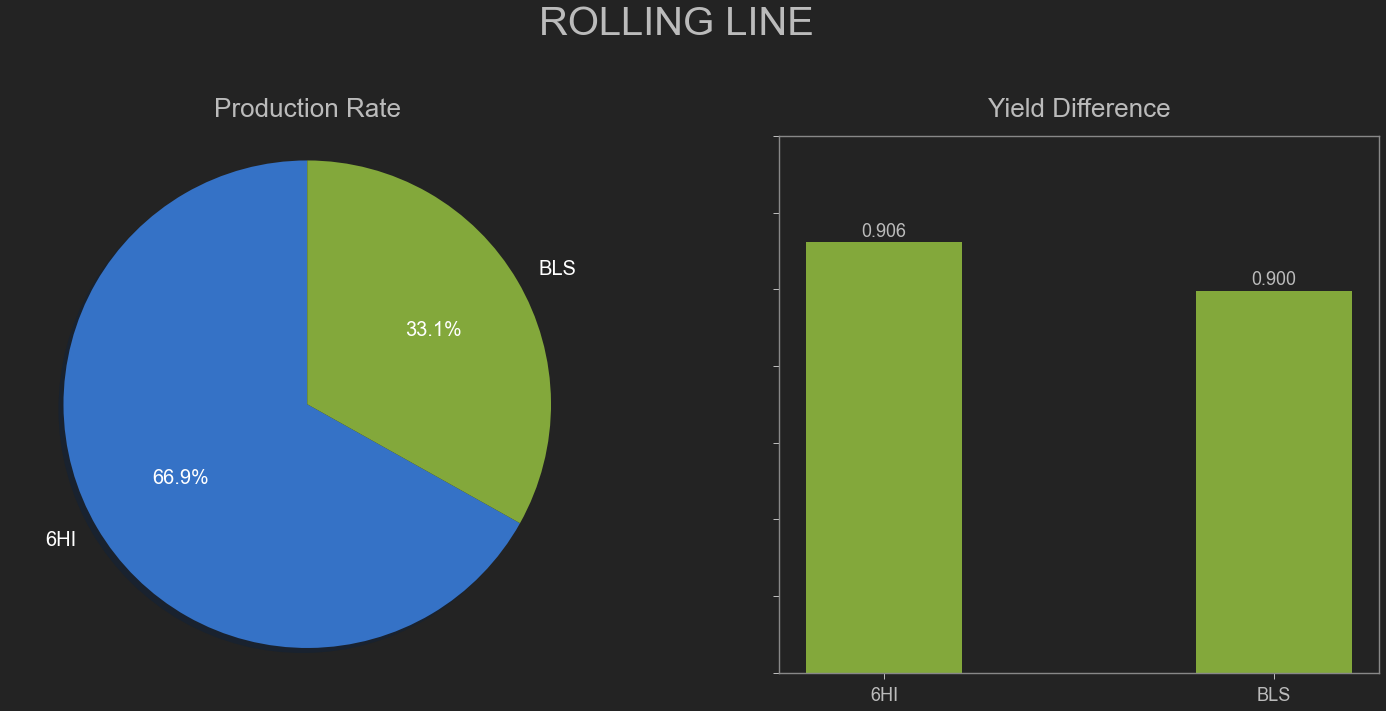

In [14]:
case1 = df[df['status'] != 'Acceptable']
count_case = case1['ROLLING_LINE'].value_counts().reset_index()
yield_case = case1.groupby('ROLLING_LINE')['YIELD(%)'].mean().reset_index()

fig, (ax1, ax2) = plt.subplots(1, 2,figsize=(20,10))
fig.tight_layout(w_pad=10)
fig.suptitle('ROLLING LINE ',size=40)
fig.subplots_adjust(top=0.8)
ax1.set_title('Production Rate',size=26,pad=20)
ax2.set_title('Yield Difference',size=26,pad=20)
ax1.pie(count_case['ROLLING_LINE'], labels=count_case['index'], autopct='%1.1f%%',
        shadow=True, startangle=90,textprops={'color':'w','size': '20'})
ax1.axis('equal')
axx = ax2.bar(yield_case['ROLLING_LINE'], yield_case['YIELD(%)'], color ='g',
        width = 0.4)
ax2.axis(ymin=0.85,ymax=0.92)
ax2.set_xticklabels(yield_case['ROLLING_LINE'],size=18)
ax2.set_yticklabels(' ')
ax2.bar_label(axx,fmt='%.3f',padding=2, size=18)




diagrams above indices that 6HI Line have more production rate and higher yield than BLS, this result make BLS line have low capacity and low efficiency. but why this company still running this line? we must know characteristic of coil producted for each line first.

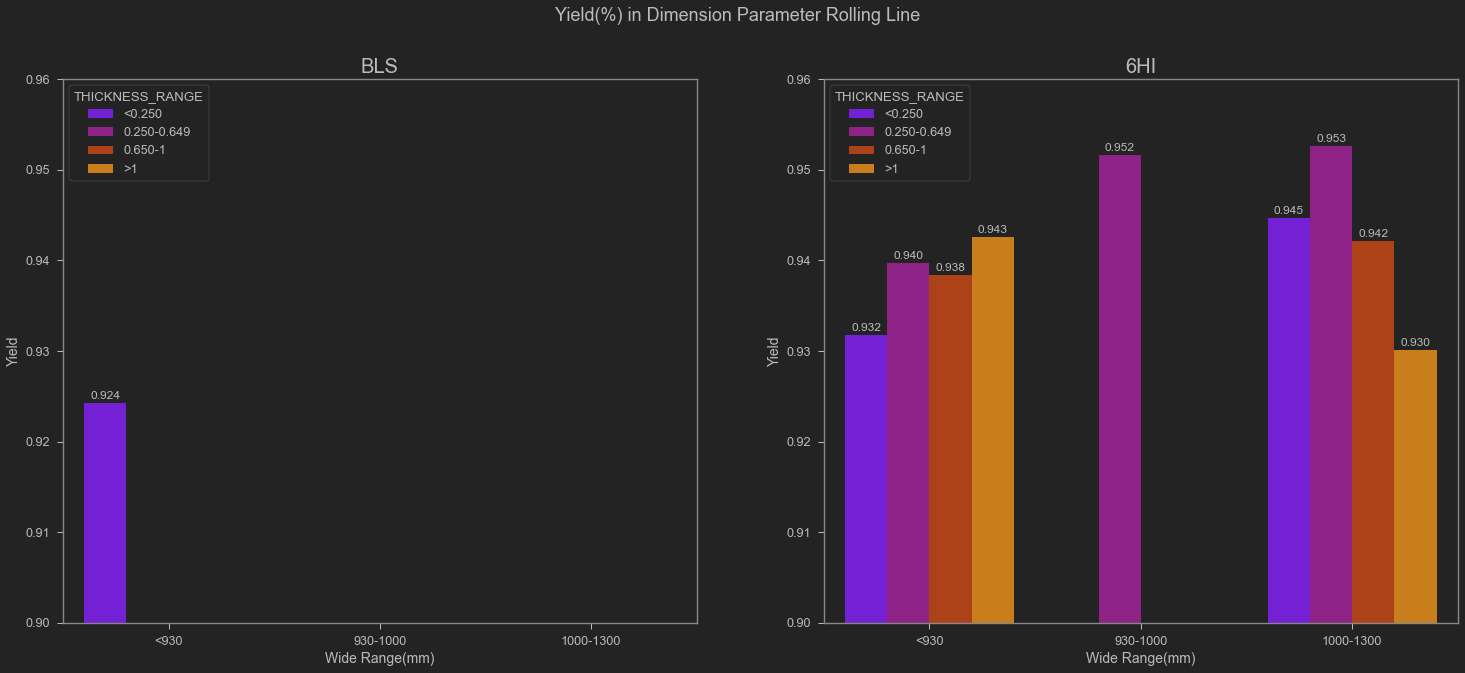

In [15]:
group_yield = df.groupby(['ROLLING_LINE','WIDTH_RANGE','THICKNESS_RANGE'])['YIELD(%)'].mean().reset_index().sort_values(['ROLLING_LINE','WIDTH_RANGE','THICKNESS_RANGE'],ascending=False)

plt.figure(figsize=(25,10))
plt.suptitle('Yield(%) in Dimension Parameter Rolling Line', size=18)
for index, col in enumerate(group_yield['ROLLING_LINE'].unique(), start=1):
    plt.subplot(1,2,index)
    dat = (group_yield['ROLLING_LINE'] == col)
    plt.title(col,size=20)

    ax = sns.barplot(x='WIDTH_RANGE', y='YIELD(%)',hue='THICKNESS_RANGE', data=group_yield[dat],palette='gnuplot')
    plt.xlabel('Wide Range(mm)',size=14)
    plt.ylabel('Yield',size=14)
    plt.ylim(0.9,0.96)
    for container in ax.containers:
        ax.bar_label(container,fmt='%.3f',padding=2, size=12)



for characteristic product, 6HI still have more variance than BLS line, in graph above indices that BLS in this dataset, just process for CRC product with Characteristic less than 930 for width CRC and <0.250mm for thickness. Or can BLS line process the CRC with MILL EDGE characteristic? how Mill Edge coil effect to yield?

### Mill edge coil analysis

In [16]:
df['MILL_EDGE'] = np.where(df['SLITING_TONNAGE_OUTPUT'].isna(),'No','Yes')
print(df.groupby('MILL_EDGE')['MILL_EDGE'].count())
print(df.groupby(['ROLLING_LINE','MILL_EDGE'])['MILL_EDGE'].count())

MILL_EDGE
No     777
Yes    680
Name: MILL_EDGE, dtype: int64
ROLLING_LINE  MILL_EDGE
6HI           No           570
              Yes          680
BLS           No           207
Name: MILL_EDGE, dtype: int64


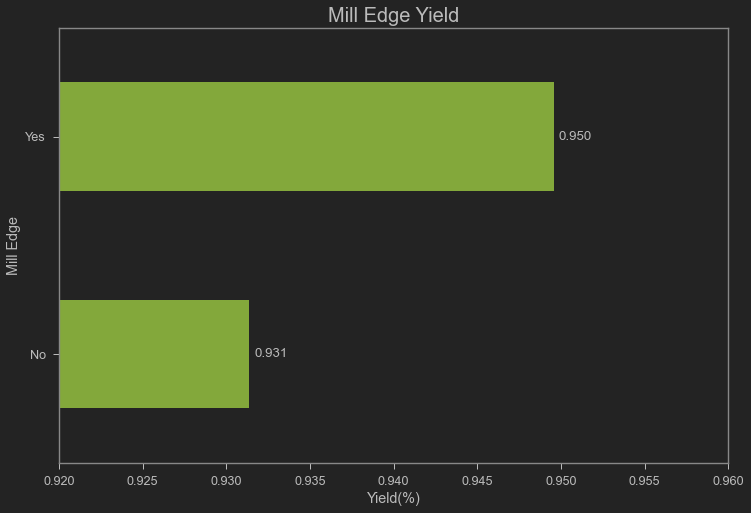

In [17]:
edge_yield = df.groupby('MILL_EDGE')['YIELD(%)'].mean().reset_index()
x = pd.Series(edge_yield['YIELD(%)'])
y = edge_yield['MILL_EDGE']


plt.figure(figsize=(12, 8))
ax = x.plot(kind='barh', color='g')
ax.set_title('Mill Edge Yield',size=20)
ax.set_xlabel('Yield(%)')
ax.set_ylabel('Mill Edge')
ax.set_yticklabels(y)
ax.set_xlim(0.92, 0.96) 
rects = ax.patches


for rect in rects:

    x_value = rect.get_width()
    y_value = rect.get_y() + rect.get_height() / 2
    space = 5
    ha = 'left'
    if x_value < 0:
        space *= -1
        ha = 'right'
    label = "{:.3f}".format(x_value)


    plt.annotate(
        label,                      
        (x_value, y_value),         
        xytext=(space, 0),          
        textcoords="offset points", 
        va='center',                
        ha=ha)                      
                                    


Mill edge coil have significant impact for CRC yield, but BLS line still didn't produce Mill Edge CRC, that's why BLS line have lower efficient than 6hi, for distribution CRC size in Mill edge will show below.

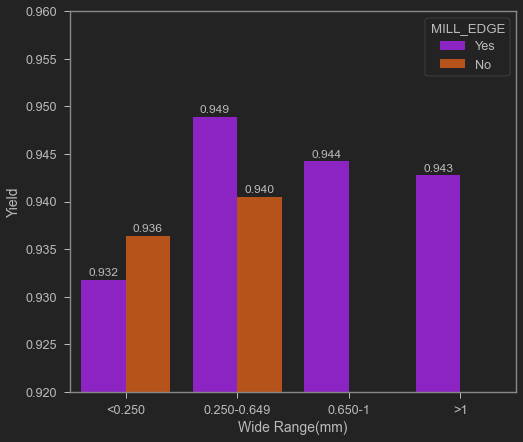

In [18]:
group_yield2 = df.groupby(['MILL_EDGE','WIDTH_RANGE','THICKNESS_RANGE'])['YIELD(%)'].mean().reset_index().sort_values(['MILL_EDGE','WIDTH_RANGE','THICKNESS_RANGE'],ascending=False)
ax = sns.barplot(x='THICKNESS_RANGE', y='YIELD(%)',hue='MILL_EDGE', data=group_yield2,palette='gnuplot',ci=None)
plt.xlabel('Wide Range(mm)',size=14)
plt.ylabel('Yield',size=14)
plt.ylim(0.92,0.96)
for container in ax.containers:
    ax.bar_label(container,fmt='%.3f',padding=2, size=12)



next, we need to know how about time rolling for every size in cold rolling process

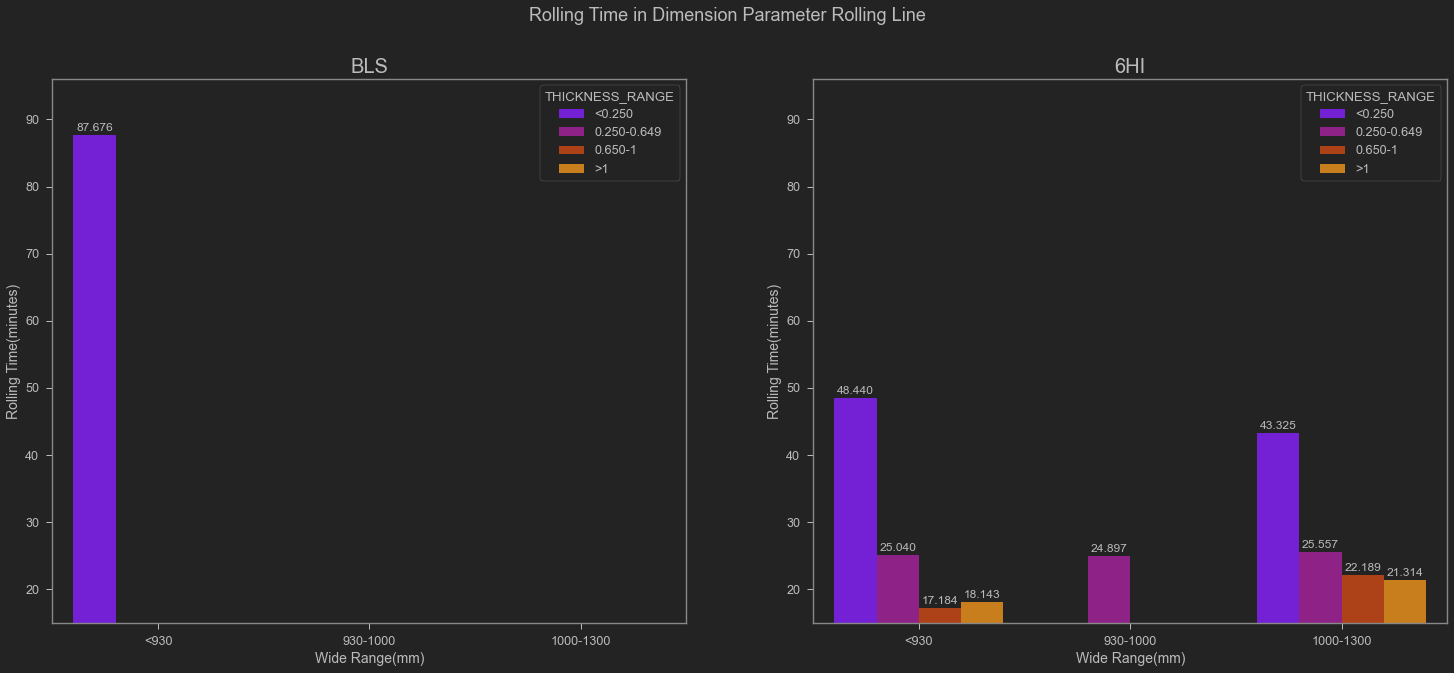

In [19]:
group_yield = df.groupby(['ROLLING_LINE','WIDTH_RANGE','THICKNESS_RANGE'])['ROLLING_TIME'].mean().reset_index().sort_values(['ROLLING_LINE','WIDTH_RANGE','THICKNESS_RANGE'],ascending=False)

plt.figure(figsize=(25,10))
plt.suptitle('Rolling Time in Dimension Parameter Rolling Line', size=18)
for index, col in enumerate(group_yield['ROLLING_LINE'].unique(), start=1):
    plt.subplot(1,2,index)
    dat = (group_yield['ROLLING_LINE'] == col)
    plt.title(col,size=20)

    ax = sns.barplot(x='WIDTH_RANGE', y='ROLLING_TIME',hue='THICKNESS_RANGE', data=group_yield[dat],palette='gnuplot')
    plt.xlabel('Wide Range(mm)',size=14)
    plt.ylabel('Rolling Time(minutes)',size=14)
    plt.ylim(15,96)
    for container in ax.containers:
        ax.bar_label(container,fmt='%.3f',padding=2, size=12)

   for rolling time in every CRC size show that time is more influenced by thickness. it's because we need more time to reduce thinner thickness, thickness reducted step by step, steel have %elongation that indice ability to deformation that occurs before a material eventually breaks, common HRC have elongation about 32%. if we reduce the thickness above that elongation. the coil will strip break.
   
   So we can decide that BLS still use because to distribute the <0.20 CRC Order from 6HI. the less 6HI process CRC with target <0.250, the more 6HI will process other size and make more productivity for company, example the time used for process **1 Coil** <0.250 with width <930 is almost same the time used for approx. **3 coil** with 0.650-1.000 thickness and <930mm width (1:3). this can be option if the company have full production, it can make time more efficient.

last but not least, some coil may not always low yield caused by process parameter, it also comes from raw material itself, the finishing line will note that if the coil produced more scrap than usual, it'll write in remark.

### defect data analysis

In [20]:
# see the remark note
df[(df['YIELD(%)'] <0.92)]['REMARK'].value_counts()

Scrap more due to Wrinkle                                                 9
Scrap More Due To wrinkle                                                 7
Scrap more due to wavy                                                    7
Scrap more due to Kink Mark                                               4
Scrap more due to R/R coil                                                4
scrap more due to wavy & id more from blismill                            4
Scrap more due to Wavy and crack                                          3
scrap more due to crack from 6-himill                                     3
Scarp more due to wavy                                                    3
Scrap more due to kink mark                                               2
Scrap more due to pinch mark and ridge                                    2
Scrap more due to Wavy and colant mark                                    2
Scrap  more due to wavy                                                   1
Scrap more E

In [21]:
# we counting the defect detected in coil
defects = ['wrinkle','mark','r/r','crack','cbu','kink','over','wavy','error','scratch','chamber','ridge'] # common defect
defect_count = []
for defect in defects :
    deftot = pd.DataFrame(columns=['defect', 'total'])
    deftot = deftot.append({'defect' : defect},ignore_index=True)
    deftot['total'] = df[(df['YIELD(%)'] <0.92)]['REMARK'].str.contains(defect,case=False).sum()
    defect_count.append(deftot)
    del deftot

defect_final = pd.concat(defect_count, ignore_index=False)
defect_final.reset_index(drop=True).sort_values('total',ascending=False)

,defect,total
7,wavy,27
3,crack,20
0,wrinkle,18
1,mark,15
5,kink,10
2,r/r,7
9,scratch,3
11,ridge,3
10,chamber,2
4,cbu,1


so many defect that occurs in this dataset, but we have to simplified the defect to make easier to analize. defect in CRC commonly divided by 2. first, defect that occur at edge of the strip of coil, then the other occur at the center of the strip. the edge defect in the table above is : crack and wavy. if this defect occur, the weight loss will calculate in trimming lose, but if mill edge coil. it'll strip cut when edge defect occur or it'll rerolling to reduce the defect. then the other defect will calculate in ID scrap. 


## Conclusion


After we analyze the dataset of coil production, we can decide the conclusion as the point below:
    
 * Cold Rolling Mill is the one of process in Steel Manufacturing, that produced Cold Rolled Coil.
 * there are 1303 Coils that acceptable to send to customer, but there are 154 coil that below threshold.
 * lower yield caused by scrap or byproduct that producted from every process line
 * 6HI Line have more production rate  66.9% and higher yield 0.906 than BLS from total coil that below threshold
 * lower yield mostly occur for coil with thickness <0.250 and width <930mm for every cold rolling mill, its result approx  0.92%
 * lower yield occur because coil with target thickness thinner need ID from raw material thickness to avoid coil collapse caused by tension to inner diameter.
 * Mill edge coil is the coil that was edge cut from sliting line.
 * Mill edge coil have higher average yield 0.95% than non-Mill edge 0.93%.
 * BLS can be optional line for distribution coil with target thickness <0.250mm to maximize time efficient up to 30%
 * mostly defect occur is edge defect that make trimming lose in finishing line higher.